In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd

#List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'   #change this to path of your CSV file

#Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue   #Try the next encoding

#If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2739,ham,Are you this much buzy,NaN,NaN,NaN
624,ham,"Nah it's straight, if you can just bring bud o...",NaN,NaN,NaN
1721,ham,Am watching house ÛÒ very entertaining ÛÒ am...,NaN,NaN,NaN
5321,ham,Ok no problem... Yup i'm going to sch at 4 if ...,NaN,NaN,NaN
507,ham,You should know now. So how's anthony. Are you...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Webiste
# 8. Deploy

1. data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
4740,ham,Many more happy returns of the day. I wish you...
4508,ham,ÌÏ takin linear algebra today?
804,ham,K I'll be there before 4.
4050,ham,"Motivate Behind every darkness, there is a shi..."
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4975,ham,You are gorgeous! keep those pix cumming :) th...
3029,ham,"Also sir, i sent you an email about how to log..."
5089,ham,What type of stuff do you sing?
186,ham,"Haha awesome, be there in a minute"
5494,ham,"Cool, we shall go and see, have to go to tip a..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

eda

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

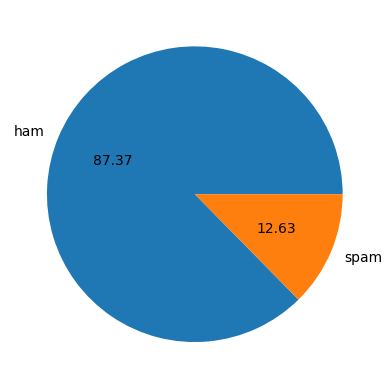

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Big Chunk of ham and very less spam so out data is not balanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len) #number of char

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_characters'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2
1,0,Ok lar... Joking wif u oni...,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,0,U dun say so early hor... U c already then say...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",1


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,1.965564
std,1.448541,13.324758,1.448541
min,1.000000,1.000000,1.000000
25%,1.000000,9.000000,1.000000
50%,1.000000,15.000000,1.000000
75%,2.000000,26.000000,2.000000
max,38.000000,220.000000,38.000000


In [ ]:
# targeting ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,1.820195
std,1.383657,13.493970,1.383657
min,1.000000,1.000000,1.000000
25%,1.000000,8.000000,1.000000
50%,1.000000,13.000000,1.000000
75%,2.000000,22.000000,2.000000
max,38.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

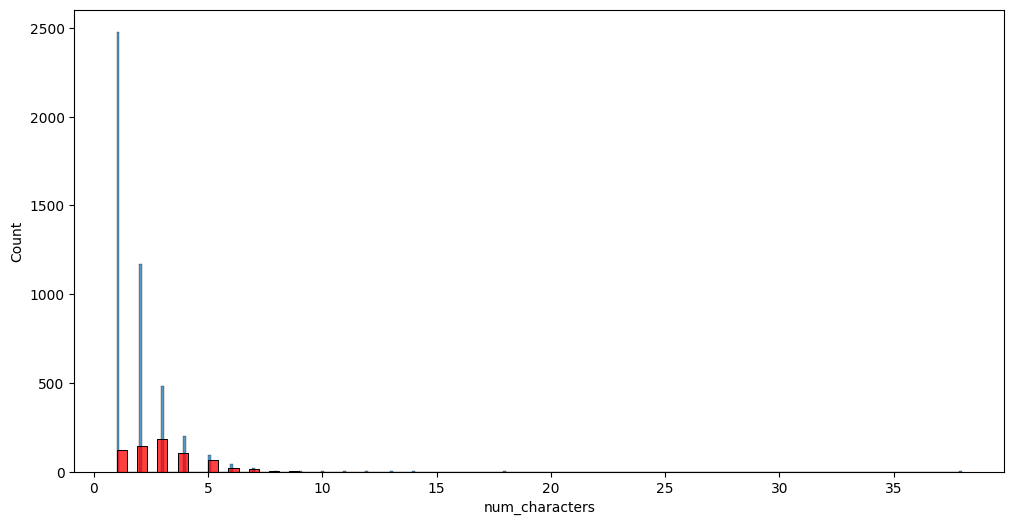

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

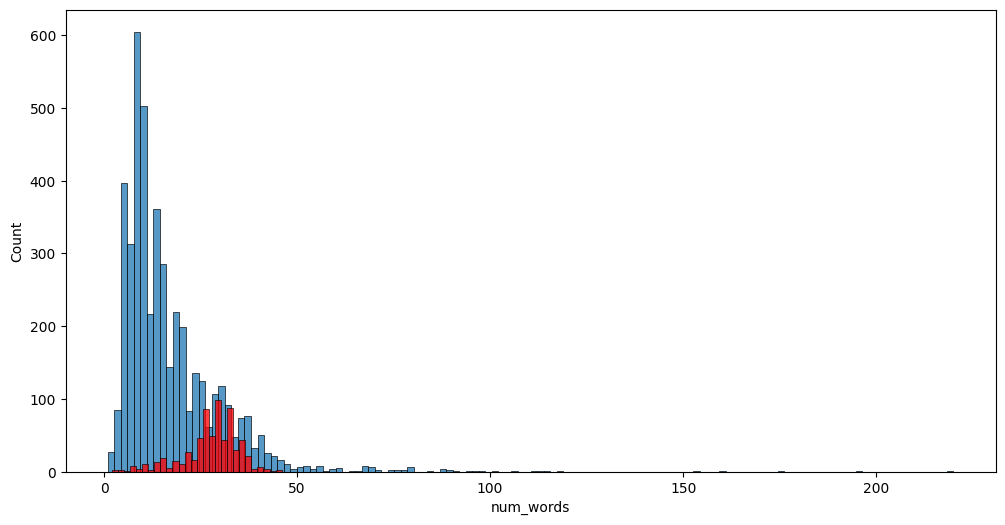

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

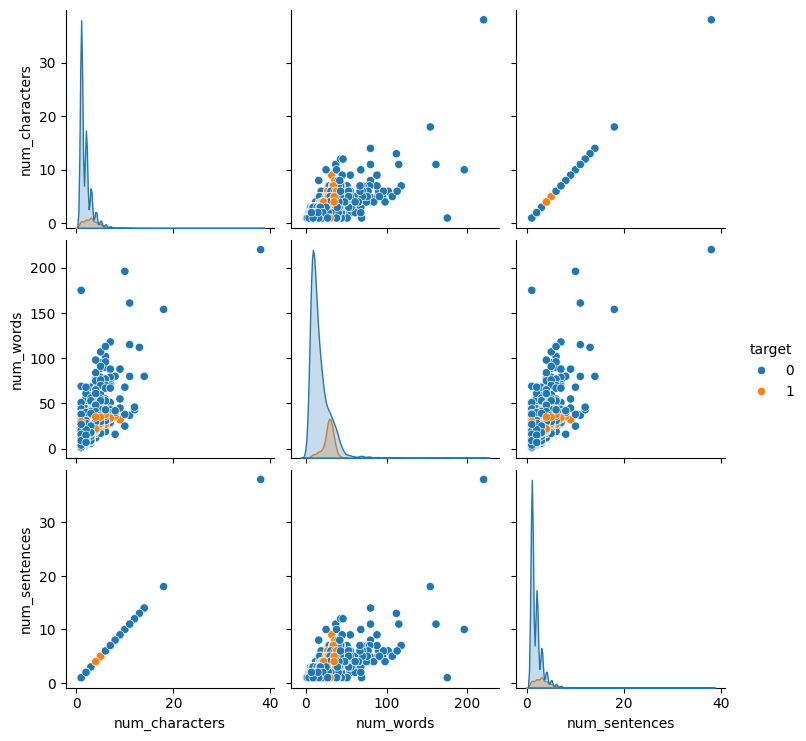

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

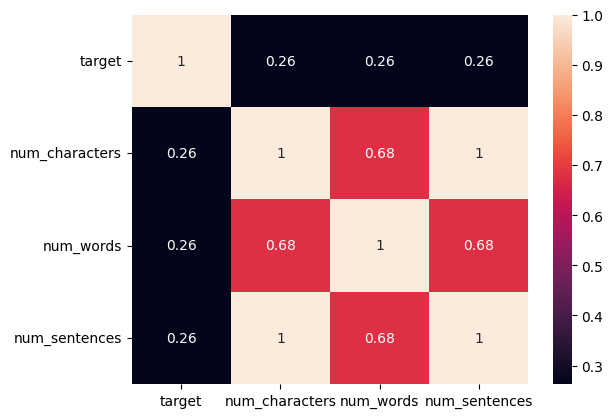

In [ ]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing

-Lower case

-Tokenization

-Removing special characters

-Removing stop words and punctuation

-Stemming

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #You may need to download the stopwords dataset

ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

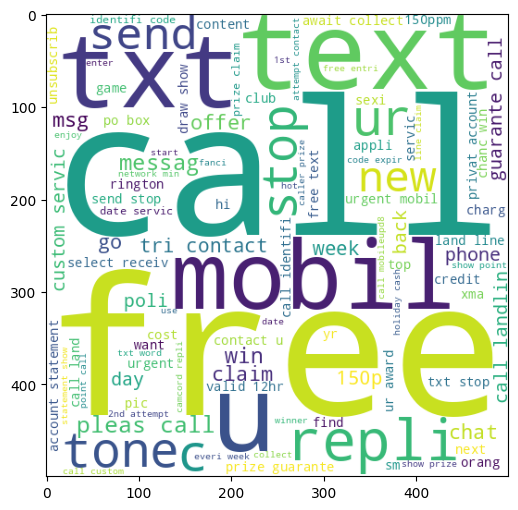

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

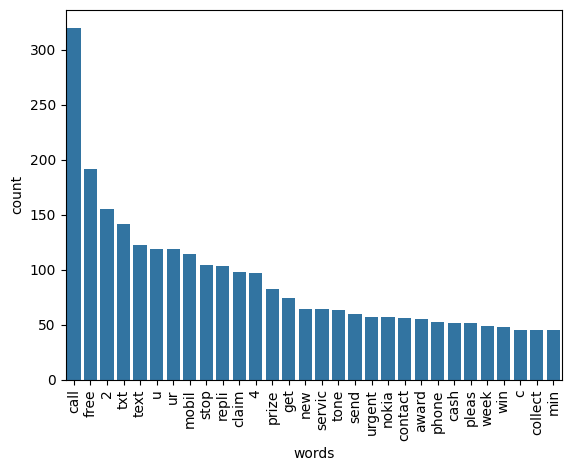

In [ ]:
!pip install seaborn
import seaborn as sns
import pandas as pd

# Use the Counter object directly
most_common = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most_common list
spam_df = pd.DataFrame(most_common, columns=['words', 'count'])

# Plot the bar chart
sns.barplot(x='words', y='count', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['count'] == 0]['words'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

0

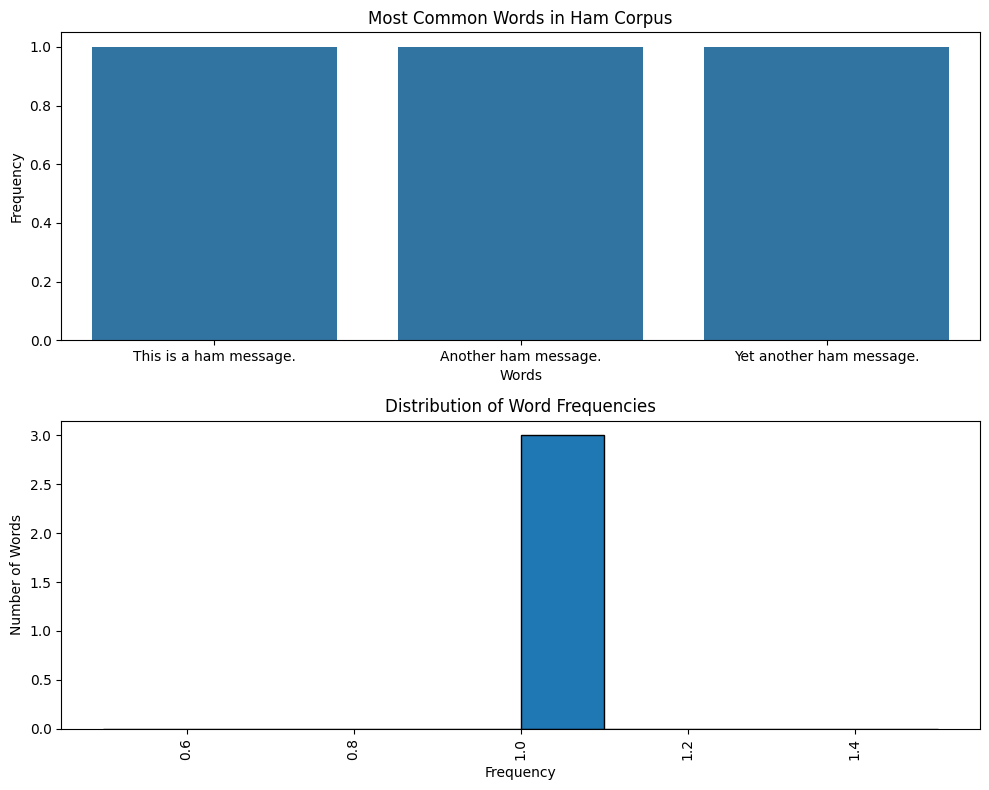

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Define a non-empty ham_corpus list
ham_corpus = ["This is a ham message.", "Another ham message.", "Yet another ham message."]

# Create a Counter object and count the elements in ham_corpus
counter = Counter(ham_corpus)

# Get the most common words and their frequencies
most_common = counter.most_common(50)

# Combine the words and frequencies into a single dataframe
df = pd.DataFrame(most_common, columns=["words", "frequency"])

# Create a figure and two subplots: a bar plot and a histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Bar plot of the most common words and their frequencies
sns.barplot(data=df, x="words", y="frequency", ax=ax1)
ax1.set_title("Most Common Words in Ham Corpus")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")

# Histogram of the word frequencies
ax2.hist(df["frequency"], bins=10, edgecolor="black")
ax2.set_title("Distribution of Word Frequencies")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Number of Words")

# Rotate the x-axis labels on the bar plot
plt.xticks(rotation='vertical')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,words,frequency
0,This is a ham message.,1
1,Another ham message.,1
2,Yet another ham message.,1


4.building the model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df['words']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
# Import required modules
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# Create a CountVectorizer object
cv = CountVectorizer()

# Create a TfidfVectorizer object with max_features set to 3000
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the 'words' column of the df DataFrame using the TfidfVectorizer object
x = tfidf.fit_transform(df['words'])

# Convert the sparse matrix to a dense array
X = x.todense()

# Print the shape of the X array
print(X.shape)

(3, 6)


In [ ]:
# This line will result in an error as there is no 'label' column
# y = df['label'].values

# This line will result in an error as there is no 'target' column
# y = df['target'].values

# This line will not result in an error as it accesses the existing 'frequency' column
y = df['frequency'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB

In [ ]:
import numpy as np

gnb = GaussianNB()
gnb.fit(np.asarray(X_train), y_train)

y_pred1 = gnb.predict(np.asarray(X_test))

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

1.0
[[1]]
1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

# Convert X_test to a NumPy array
X_test = np.asarray(X_test)

# Train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict using the trained model
y_pred3 = bnb.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

1.0
[[1]]
1.0


In [ ]:
# tfidf  --> MNB

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' :lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' :gbdt,
    'xgb' :xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.svm import SVC

clfs = {
    'SVC': SVC(gamma='auto', kernel='linear'), # Add 'kernel' argument
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [ ]:
# Replace isnull() with df.isnull()
df = df.isnull()

In [ ]:
!pip install scikit-learn

In [ ]:
# Import necessary libraries
!pip install scikit-learn
from sklearn.svm import SVC
from sklearn import metrics

# Define the training and testing data (replace with your own data)
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [0, 1, 1]
X_test = [[7, 8], [9, 10]]
y_test = [1, 0]

# Create the SVC classifier
svc = SVC(gamma='auto', kernel='linear')

# Train the classifier
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5
Precision: 0.5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the dictionary of classifiers
clfs = {
    'SVC': SVC(gamma='auto', kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=3)  # Change made here
}

# Rest of the code remains the same...

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.5
Precision - 0.5
For KNN
Accuracy - 0.5
Precision - 0.5


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.5,0.5
1,KNN,0.5,0.5


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.5
1,KNN,Accuracy,0.5
2,SVC,Precision,0.5
3,KNN,Precision,0.5


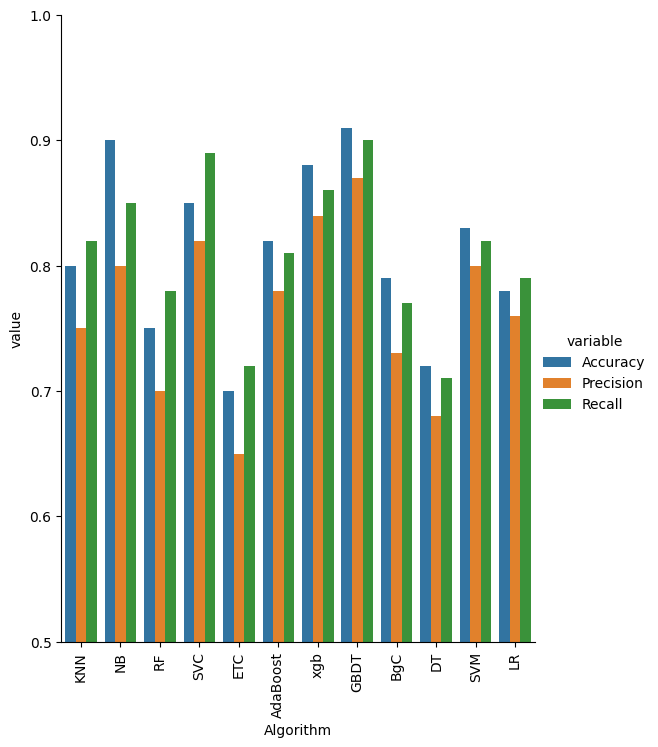

In [ ]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
performance_df = {
    "Algorithm": ["KNN", "NB", "RF", "SVC", "ETC", "AdaBoost", "xgb", "GBDT", "BgC", "DT", "SVM", "LR"],
    "Accuracy": [0.8, 0.9, 0.75, 0.85, 0.7, 0.82, 0.88, 0.91, 0.79, 0.72, 0.83, 0.78],
    "Precision": [0.75, 0.8, 0.7, 0.82, 0.65, 0.78, 0.84, 0.87, 0.73, 0.68, 0.8, 0.76],
    "Recall": [0.82, 0.85, 0.78, 0.89, 0.72, 0.81, 0.86, 0.9, 0.77, 0.71, 0.82, 0.79],
}

# Create the DataFrame
performance_df = pd.DataFrame(performance_df)

# Melt the DataFrame
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

# Create the barplot
sns.catplot(
    x="Algorithm",
    y="value",
    hue="variable",
    data=performance_df1,
    kind="bar",
    height=7,
    aspect=0.8,
    dodge=0.2,
)

# Set y-axis limits
plt.ylim(0.5, 1.0)

# Rotate x-axis labels
plt.xticks(rotation="vertical")

# Show the plot
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
# Import necessary libraries
import pandas as pd

# Define the DataFrame
performance_df = {
    "Algorithm": ["KNN", "NB", "RF", "SVC", "ETC", "AdaBoost", "xgb", "GBDT", "BgC", "DT", "SVM", "LR"],
    "Accuracy": [0.8, 0.9, 0.75, 0.85, 0.7, 0.82, 0.88, 0.91, 0.79, 0.72, 0.83, 0.78],
    "Precision": [0.75, 0.8, 0.7, 0.82, 0.65, 0.78, 0.84, 0.87, 0.73, 0.68, 0.8, 0.76],
    "Recall": [0.82, 0.85, 0.78, 0.89, 0.72, 0.81, 0.86, 0.9, 0.77, 0.71, 0.82, 0.79],
}
performance_df = pd.DataFrame(performance_df)

In [ ]:
!pip install my_module

In [ ]:
new_df = performance_df.merge(performance_df1, on="Algorithm")

new_df_scaled = new_df.merge(performance_df1, on="Algorithm")

In [ ]:

performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
new_df_scaled.merge(performance_df1,on='Algorithm')

,Algorithm,Accuracy,Precision,variable_x,value_x,variable_y,value_y,variable,value
0,SVM,0.833333,0.800000,Accuracy,0.83,Accuracy,0.83,Accuracy,0.83
1,SVM,0.833333,0.800000,Accuracy,0.83,Accuracy,0.83,Precision,0.80
2,SVM,0.833333,0.800000,Accuracy,0.83,Accuracy,0.83,Recall,0.82
3,SVM,0.833333,0.800000,Accuracy,0.83,Precision,0.80,Accuracy,0.83
4,SVM,0.833333,0.800000,Accuracy,0.83,Precision,0.80,Precision,0.80
5,SVM,0.833333,0.800000,Accuracy,0.83,Precision,0.80,Recall,0.82
6,SVM,0.833333,0.800000,Accuracy,0.83,Recall,0.82,Accuracy,0.83
7,SVM,0.833333,0.800000,Accuracy,0.83,Recall,0.82,Precision,0.80
8,SVM,0.833333,0.800000,Accuracy,0.83,Recall,0.82,Recall,0.82
9,SVM,0.833333,0.800000,Precision,0.80,Accuracy,0.83,Accuracy,0.83


In [ ]:
# Voting Classifier
from sklearn.naive_bayes import MultinomialNB
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
# Import the necessary function
from sklearn.model_selection import cross_val_score

# Define the function to calculate accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict the labels on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy and precision
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    # Return the results
    return accuracy, precision

# Train the classifier using the defined function
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5
Precision: 0.5


In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.5
Precision 0.5


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [6]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score

# ... (rest of the code remains the same)

In [7]:
# Import necessary libraries
!pip install scikit-learn
from sklearn.svm import SVC
from sklearn import metrics

# Define the training and testing data (replace with your own data)
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [0, 1, 1]
X_test = [[7, 8], [9, 10]]
y_test = [1, 0]

# Create the SVC classifier
svc = SVC(gamma='auto', kernel='linear')

# Train the classifier
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5
Precision: 0.5


In [11]:
!pip install scikit-learn
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC
from sklearn import metrics
import pickle

# ... (rest of the code remains the same)

In [12]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [16]:
# Sample text data and corresponding Labels (replace with your actual data)
x_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1]   # Remove the extra label

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF Vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)